# Introduction to Pandas

<img src="https://miro.medium.com/max/1400/1*6d5dw6dPhy4vBp2vRW6uzw.png" width = 500>

## Learning Objectives

**After this lesson, you will be able to:**
- Define what pandas is and how it relates to data analysis/data science.
- Manipulate pandas dataframes and series.
- Read in csv data from a variety of places.
- Filter and sort data using pandas.
- Manipulate dataframe columns.
- Know how to handle null and missing values.

## What are python libraries?

In Lesson 1 we learned to create functions - blocks of code you expect to re-use multiple times. If you think there are other people who would need it as well, you can make your code available for others to install and use - these are called libraries.

## What is pandas?

- `pandas` is a data analysis library for Python
- stands for "panel data"

It helps with data analysis because it is: 
- fast
- has lots of useful functionality
- a large open source community

We have already downloaded pandas as part of the installation instructions, now we need to import it into this notebook:

In [3]:
import pandas as pd

Every Python library will have documentation online:

https://pandas.pydata.org/docs/reference/index.html

I generally find google has better search functionality than internal search on the website.

Have a look at the different fields in this example: 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby

## A few quick examples of things you can do in pandas

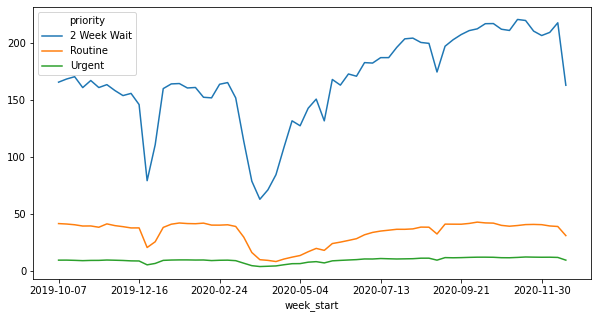

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/carnall-farrar/python_club/master/data/referrals_oct19_dec20.csv')
pd.pivot_table(df,values='referrals',index='week_start',columns='priority').plot(figsize=(10,5))

## Let's start with the building blocks of pandas

Pandas introduces two important new data types: `Series` and `DataFrame`

`Series`

A `Series` is a sequence of items, where each item has a unique label (called an `index`). At first it might seem the same as a list, but there are a few differences:
- They can have custom indices like a dictionary
- They allow vectorised operations
- They are the building blocks of dataframes

In [5]:
my_first_series = pd.Series(['a', 'b', 'c', 'd'])
my_first_series

0    a
1    b
2    c
3    d
dtype: object

`DataFrame`

A `DataFrame` is a table of data. It is a collection on pandas series. Each row has a unique label (the `row index`), and each column has a unique label (the `column index`).

In [6]:
my_first_dataframe = pd.DataFrame({'Name': ['Tinky Winky', 'Dipsy','Lala', 'Po'], 'Colour': ['Purple', 'Green', 'Yellow', 'Red']})
my_first_dataframe.sort_values(by = 'Name')

,Name,Colour
1,Dipsy,Green
2,Lala,Yellow
3,Po,Red
0,Tinky Winky,Purple


In [7]:
type(my_first_dataframe['Name'])

pandas.core.series.Series

To review: A pandas series is a list of data with an associated index, and a pandas dataframe is a collection of series with a shared index.

### Reading Files, Selecting Columns, and Summarizing

To read in a file, we use the method read_csv (or read_excel), and the path to the file. As you saw above we can also use a url.

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/carnall-farrar/python_club/master/data/referrals_oct19_dec20.csv')
df

,week_start,ccg_code,specialty,priority,referrals
0,2019-10-07,00L,(blank),Routine,13
1,2019-10-07,00L,(blank),Urgent,1
2,2019-10-07,00L,2WW,2 Week Wait,349
3,2019-10-07,00L,Allergy,Routine,3
4,2019-10-07,00L,Cardiology,Routine,84
...,...,...,...,...,...
592679,2020-12-21,99M,Surgery - Not Otherwise Specified,Urgent,2
592680,2020-12-21,99M,Surgery - Vascular,Routine,2
592681,2020-12-21,99M,Surgery - Vascular,Urgent,2
592682,2020-12-21,99M,Urology,Routine,25


Ususally you would read from a CSV saved on your computer, which you specify with a file path:

```python
# example only
df = pd.read_csv("/path/to/your/data/file.csv")
```

There are a few in-built methods that can help us to get a feel for the data:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592684 entries, 0 to 592683
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   week_start  592684 non-null  object
 1   ccg_code    592684 non-null  object
 2   specialty   592684 non-null  object
 3   priority    592684 non-null  object
 4   referrals   592684 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 22.6+ MB


In [10]:
df.describe(include = 'all')

,week_start,ccg_code,specialty,priority,referrals
count,592684,592684,592684,592684,592684.000000
unique,64,135,57,3,NaN
top,2019-10-14,91Q,Cardiology,Routine,NaN
freq,11631,13496,22472,331289,NaN
mean,NaN,NaN,NaN,NaN,28.039053
std,NaN,NaN,NaN,NaN,72.963456
min,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,2.000000
50%,NaN,NaN,NaN,NaN,7.000000
75%,NaN,NaN,NaN,NaN,23.000000


In [11]:
df.columns

Index(['week_start', 'ccg_code', 'specialty', 'priority', 'referrals'], dtype='object')

In [12]:
df.shape

(592684, 5)

If we want to look at individual columns, we use square brackets.

In [13]:
df['specialty']
df[['specialty']]

,specialty
0,(blank)
1,(blank)
2,2WW
3,Allergy
4,Cardiology
...,...
592679,Surgery - Not Otherwise Specified
592680,Surgery - Vascular
592681,Surgery - Vascular
592682,Urology


In [14]:
df['specialty'].unique()

array(['(blank)', '2WW', 'Allergy', 'Cardiology',
       "Children's & Adolescent Services", 'Dermatology',
       'Diabetic Medicine', 'Diagnostic Endoscopy', 'Ear, Nose & Throat',
       'Endocrinology and Metabolic Medicine',
       'GI and Liver (Medicine and Surgery)', 'General Medicine',
       'Geriatric Medicine', 'Gynaecology', 'Haematology', 'Immunology',
       'Infectious Diseases', 'Nephrology', 'Neurology', 'Neurosurgery',
       'Ophthalmology', 'Oral and Maxillofacial Surgery', 'Orthopaedics',
       'Pain Management', 'Physiotherapy', 'Rehabilitation',
       'Respiratory Medicine', 'Rheumatology', 'Sleep Medicine',
       'Surgery - Breast', 'Surgery - Not Otherwise Specified',
       'Surgery - Plastic', 'Surgery - Vascular', 'Urology',
       'Diagnostic Physiological Measurement', 'Podiatry', 'Dietetics',
       'Health Promotion', 'Genetics',
       'Mental Health - Adults of all ages',
       'Mental Health - Child and Adolescent', 'Diagnostic Imaging',
       'O

In [15]:
df['priority'].value_counts()

Routine        331289
Urgent         243405
2 Week Wait     17990
Name: priority, dtype: int64

## Exercise

1) Read in the data from this dataset: 

https://raw.githubusercontent.com/carnall-farrar/python_club/master/data/top_50_songs.csv

2) Print a list of all genres 

3) Find the average popularity score

In [16]:
df_exercise = pd.read_csv('https://raw.githubusercontent.com/carnall-farrar/python_club/master/data/top_50_songs.csv')
df_exercise['Genre'].unique()

array(['neo mellow', 'detroit hip hop', 'dance pop', 'pop',
       'canadian pop', 'hip pop', 'barbadian pop', 'atl hip hop',
       'australian pop', 'indie pop', 'art pop', 'colombian pop',
       'big room', 'british soul', 'chicago rap', 'acoustic pop',
       'permanent wave', 'boy band', 'baroque pop', 'celtic rock',
       'electro', 'complextro', 'canadian hip hop', 'candy pop',
       'alaska indie', 'folk-pop', 'metropopolis', 'house',
       'australian hip hop', 'electropop', 'australian dance',
       'hollywood', 'canadian contemporary r&b',
       'irish singer-songwriter', 'tropical house', 'belgian edm',
       'french indie pop', 'hip hop', 'danish pop', 'latin',
       'canadian latin', 'electronic trap', 'edm', 'electro house',
       'downtempo', 'brostep', 'contemporary country', 'moroccan pop',
       'escape room', 'alternative r&b'], dtype=object)

In [17]:
df_exercise.describe(include = 'all')

,Title,Artist,Genre,Year,Popularity
count,603,578,603,603.000000,603.000000
unique,584,182,50,NaN,NaN
top,A Little Party Never Killed Nobody (All We Got),Katy Perry,dance pop,NaN,NaN
freq,2,17,327,NaN,NaN
mean,NaN,NaN,NaN,2014.592040,66.520730
std,NaN,NaN,NaN,2.607057,14.517746
min,NaN,NaN,NaN,2010.000000,0.000000
25%,NaN,NaN,NaN,2013.000000,60.000000
50%,NaN,NaN,NaN,2015.000000,69.000000
75%,NaN,NaN,NaN,2017.000000,76.000000


## Filtering and sorting

Pandas makes it very easy to filter the data, but its good to understand what's happening under the hood when we do this.

Performing simple comparisons gives as a series of boolean values

In [18]:
df['ccg_code'] == '00L'

0          True
1          True
2          True
3          True
4          True
          ...  
592679    False
592680    False
592681    False
592682    False
592683    False
Name: ccg_code, Length: 592684, dtype: bool

We then use that boolean series to pull out the rows that we want. We use the method `loc`:

In [19]:
df.loc[df['ccg_code'] == '00L']

,week_start,ccg_code,specialty,priority,referrals
0,2019-10-07,00L,(blank),Routine,13
1,2019-10-07,00L,(blank),Urgent,1
2,2019-10-07,00L,2WW,2 Week Wait,349
3,2019-10-07,00L,Allergy,Routine,3
4,2019-10-07,00L,Cardiology,Routine,84
...,...,...,...,...,...
584662,2020-12-21,00L,Surgery - Plastic,Urgent,1
584663,2020-12-21,00L,Surgery - Vascular,Routine,19
584664,2020-12-21,00L,Surgery - Vascular,Urgent,4
584665,2020-12-21,00L,Urology,Routine,25


The syntax is:

`my_dataframe.loc[<filter_condition>, <column>]`

We can use this both to filter the data, and also edit the values for a subset of data.

In [20]:
df.loc[df['specialty'] == '(blank)', 'specialty'] = 'Unknown'
df

,week_start,ccg_code,specialty,priority,referrals
0,2019-10-07,00L,Unknown,Routine,13
1,2019-10-07,00L,Unknown,Urgent,1
2,2019-10-07,00L,2WW,2 Week Wait,349
3,2019-10-07,00L,Allergy,Routine,3
4,2019-10-07,00L,Cardiology,Routine,84
...,...,...,...,...,...
592679,2020-12-21,99M,Surgery - Not Otherwise Specified,Urgent,2
592680,2020-12-21,99M,Surgery - Vascular,Routine,2
592681,2020-12-21,99M,Surgery - Vascular,Urgent,2
592682,2020-12-21,99M,Urology,Routine,25


There is a also a method called `iloc`, which uses numerical conditions rather than qualitative

In [21]:
df.iloc[0:10, 0:2]

,week_start,ccg_code
0,2019-10-07,00L
1,2019-10-07,00L
2,2019-10-07,00L
3,2019-10-07,00L
4,2019-10-07,00L
5,2019-10-07,00L
6,2019-10-07,00L
7,2019-10-07,00L
8,2019-10-07,00L
9,2019-10-07,00L


 We can use as many conditions as we like!

In [22]:
df.loc[(df['week_start'] == '2019-10-14') & (df['priority'] == 'Routine') & (df['specialty'] == 'Cardiology')]

,week_start,ccg_code,specialty,priority,referrals
11526,2019-10-14,00L,Cardiology,Routine,72
11582,2019-10-14,00N,Cardiology,Routine,25
11638,2019-10-14,00P,Cardiology,Routine,32
11697,2019-10-14,00Q,Cardiology,Routine,22
11751,2019-10-14,00R,Cardiology,Routine,29
...,...,...,...,...,...
22854,2019-10-14,99C,Cardiology,Routine,29
22909,2019-10-14,99E,Cardiology,Routine,45
22970,2019-10-14,99F,Cardiology,Routine,43
23034,2019-10-14,99G,Cardiology,Routine,38


## Exercise

1) Using the song data from the previous exercise, filter to just songs by Rihanna

2) Filter to pop songs with a Popularity of over 80

In [23]:
df_exercise.loc[df_exercise['Artist'] == 'Rihanna']

,Title,Artist,Genre,Year,Popularity
9,Only Girl (In The World),Rihanna,barbadian pop,2010,73
42,Hard,Rihanna,barbadian pop,2010,57
72,What's My Name?,Rihanna,barbadian pop,2011,69
85,We Found Love,Rihanna,barbadian pop,2011,61
91,Cheers (Drink To That),Rihanna,barbadian pop,2011,58
92,S&M Remix,Rihanna,barbadian pop,2011,54
126,Where Have You Been,Rihanna,barbadian pop,2012,68
133,Diamonds,Rihanna,barbadian pop,2012,61
135,You Da One,Rihanna,barbadian pop,2012,57
205,Right Now - Dyro Radio Edit,Rihanna,barbadian pop,2013,42


In [24]:
df_exercise.loc[(df_exercise['Genre'] == 'pop') & (df_exercise['Popularity'] > 80)]

,Title,Artist,Genre,Year,Popularity
211,Stay With Me,Sam Smith,pop,2014,85
268,Thinking out Loud,Ed Sheeran,pop,2015,84
269,I'm Not The Only One,Sam Smith,pop,2015,84
274,Sugar,Maroon 5,pop,2015,81
443,Shape of You,Ed Sheeran,pop,2017,87
447,That's What I Like,Bruno Mars,pop,2017,83
510,I Like It,Cardi B,pop,2018,85
572,Memories,Maroon 5,pop,2019,99
574,Someone You Loved,Lewis Capaldi,pop,2019,96
576,How Do You Sleep?,Sam Smith,pop,2019,93


## Renaming and removing columns

We can rename specific columns using a dictionary

In [25]:
df = df.rename(columns = {'referrals': 'total_referrals', 'week_start': 'week'})
df

,week,ccg_code,specialty,priority,total_referrals
0,2019-10-07,00L,Unknown,Routine,13
1,2019-10-07,00L,Unknown,Urgent,1
2,2019-10-07,00L,2WW,2 Week Wait,349
3,2019-10-07,00L,Allergy,Routine,3
4,2019-10-07,00L,Cardiology,Routine,84
...,...,...,...,...,...
592679,2020-12-21,99M,Surgery - Not Otherwise Specified,Urgent,2
592680,2020-12-21,99M,Surgery - Vascular,Routine,2
592681,2020-12-21,99M,Surgery - Vascular,Urgent,2
592682,2020-12-21,99M,Urology,Routine,25


We can also rename all the columns in one go with a list.

In [26]:
df.columns = ['Week start', 'CCG Code', 'Specialty', 'Priority', 'Total Referrals']
df

,Week start,CCG Code,Specialty,Priority,Total Referrals
0,2019-10-07,00L,Unknown,Routine,13
1,2019-10-07,00L,Unknown,Urgent,1
2,2019-10-07,00L,2WW,2 Week Wait,349
3,2019-10-07,00L,Allergy,Routine,3
4,2019-10-07,00L,Cardiology,Routine,84
...,...,...,...,...,...
592679,2020-12-21,99M,Surgery - Not Otherwise Specified,Urgent,2
592680,2020-12-21,99M,Surgery - Vascular,Routine,2
592681,2020-12-21,99M,Surgery - Vascular,Urgent,2
592682,2020-12-21,99M,Urology,Routine,25


To remove columns we can either use drop or select a subset

In [27]:
df.loc[:, ['Week start', 'Total Referrals']]

,Week start,Total Referrals
0,2019-10-07,13
1,2019-10-07,1
2,2019-10-07,349
3,2019-10-07,3
4,2019-10-07,84
...,...,...
592679,2020-12-21,2
592680,2020-12-21,2
592681,2020-12-21,2
592682,2020-12-21,25


In [28]:
df.drop(columns = 'Specialty')

,Week start,CCG Code,Priority,Total Referrals
0,2019-10-07,00L,Routine,13
1,2019-10-07,00L,Urgent,1
2,2019-10-07,00L,2 Week Wait,349
3,2019-10-07,00L,Routine,3
4,2019-10-07,00L,Routine,84
...,...,...,...,...
592679,2020-12-21,99M,Urgent,2
592680,2020-12-21,99M,Routine,2
592681,2020-12-21,99M,Urgent,2
592682,2020-12-21,99M,Routine,25


Note the difference between performing the operation in place and reassigning the change to the variable

## Handling missing data

We can locate rows with missing data using `isnull()`, or negate it with `~`

In [29]:
df.loc[df['Total Referrals'].isnull()]
df.loc[~df['Total Referrals'].isnull()]

,Week start,CCG Code,Specialty,Priority,Total Referrals
0,2019-10-07,00L,Unknown,Routine,13
1,2019-10-07,00L,Unknown,Urgent,1
2,2019-10-07,00L,2WW,2 Week Wait,349
3,2019-10-07,00L,Allergy,Routine,3
4,2019-10-07,00L,Cardiology,Routine,84
...,...,...,...,...,...
592679,2020-12-21,99M,Surgery - Not Otherwise Specified,Urgent,2
592680,2020-12-21,99M,Surgery - Vascular,Routine,2
592681,2020-12-21,99M,Surgery - Vascular,Urgent,2
592682,2020-12-21,99M,Urology,Routine,25


If we want to remove missing data we can use `dropna()` - let's take a look at the documention:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

Make sure this is actually what you want to do!

## Saving to csv

The command `to_csv` will save a csv of your data which you can then import/open in Excel. We specify the location of the file similarly to when we read in data.

I usually include `index = False` if my data has no meaningful index.

In [30]:
df.to_csv('exported_data.csv', index = False)

## Exercise

1) Rename the title column to song name

2) Filter out all the columns where the artist name is missing

In [31]:
df_exercise = df_exercise.rename(columns = {'Title': 'Song Name'})
df_exercise

,Song Name,Artist,Genre,Year,Popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,82
2,TiK ToK,Kesha,dance pop,2010,80
3,Bad Romance,Lady Gaga,dance pop,2010,79
4,Just the Way You Are,Bruno Mars,pop,2010,78
...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,69


In [32]:
df_exercise.loc[df_exercise['Artist'].isnull()]

,Song Name,Artist,Genre,Year,Popularity
5,Baby,NaN,canadian pop,2010,77
120,Beauty And A Beat,NaN,canadian pop,2012,72
123,Boyfriend,NaN,canadian pop,2012,71
172,Suit & Tie,NaN,dance pop,2013,68
182,Heartbreaker,NaN,canadian pop,2013,61
183,Mirrors - Radio Edit,NaN,dance pop,2013,60
188,TKO,NaN,dance pop,2013,58
194,Take Back the Night,NaN,dance pop,2013,54
267,Not a Bad Thing,NaN,dance pop,2014,0
271,Love Yourself,NaN,canadian pop,2015,83


In [33]:
df_exercise = df_exercise.dropna(subset = ['Artist'])
df_exercise

,Song Name,Artist,Genre,Year,Popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,82
2,TiK ToK,Kesha,dance pop,2010,80
3,Bad Romance,Lady Gaga,dance pop,2010,79
4,Just the Way You Are,Bruno Mars,pop,2010,78
...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,69
